<a href="https://colab.research.google.com/github/ShriomiGite/NLP/blob/main/Text_Classification_for_spam_and_not_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/spam.csv")
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

# **Wordcloud on spam message.**

It gives the image of the maximum words used in the data

In [ ]:
df[df['Category']=="spam"]['Message']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object

#to merge all the messages in a single string

In [ ]:
spam=" ".join(df[df['Category']=="spam"]['Message'])
spam

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [ ]:
non_spam=" ".join(df[df['Category']=="not spam"]['Message'])
non_spam

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

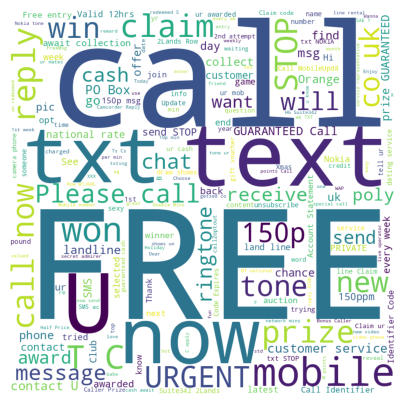

In [ ]:
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(spam)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

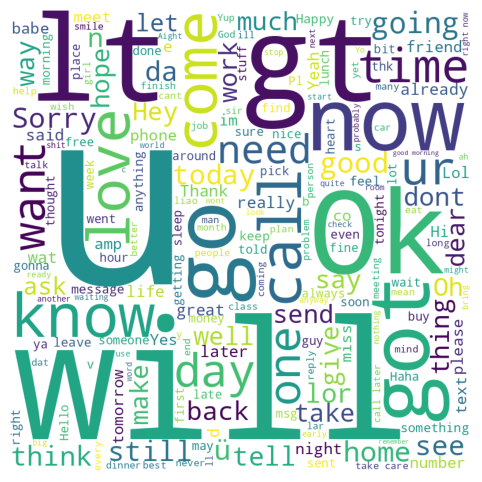

In [ ]:
wc.generate(non_spam)
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
x=df.Message
y=df.Category

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# **COUNT** **VECTORIZER**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(stop_words="english")


In [ ]:
Xtrain_cv=cv.fit_transform(xtrain)
Xtest_cv=cv.transform(xtest)

In [ ]:
Xtrain_cv

<3900x6901 sparse matrix of type '<class 'numpy.int64'>'
	with 30085 stored elements in Compressed Sparse Row format>

In [ ]:
Xtest_cv

<1672x6901 sparse matrix of type '<class 'numpy.int64'>'
	with 11737 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model=DecisionTreeClassifier()
model.fit(Xtrain_cv,ytrain)

DecisionTreeClassifier()

In [ ]:
ypred=model.predict(Xtest_cv)

#when you use decision tree one does not need to apply label encoding for the category.


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

    not spam       0.98      0.99      0.98      1442
        spam       0.90      0.87      0.89       230

    accuracy                           0.97      1672
   macro avg       0.94      0.93      0.93      1672
weighted avg       0.97      0.97      0.97      1672



#Prediction

In [ ]:
sms1="Hey, how are you,let's meet tonight"
sms2="you have won FREE iphone14,click on the link below http://fake.com"

In [ ]:
sms_cv=cv.transform([sms1])

In [ ]:
model.predict(sms_cv)[0]

'not spam'

PUTTING IT IN A FUNCTION

In [ ]:
def predict_sms(sms):
  sms_cv=cv.transform([sms1])
  return model.predict(sms_cv)[0]

In [ ]:
predict_sms(sms1)

'not spam'

In [ ]:
predict_sms(sms2)

'not spam'